In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report # this creates a confusion matrix
#from sklearn.metrics import plot_confusion_matrix                  # draws a confusion matrix
from sklearn.metrics import accuracy_score

## Simple Linear Regression

In [12]:
df = pd.read_csv('heart.csv')

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
# X and Y need to be two-dimensional arrays of shape (n_samples, n_features) and (n_sample, n_targets) 

In [15]:
heart_y = df["age"].to_numpy()
heart_y.shape

(303,)

In [16]:
heart_y = heart_y.reshape((-1,1))
heart_y.shape

(303, 1)

In [17]:
heart_X = df['chol'].to_numpy()
heart_X = heart_X.reshape((-1, 1))
heart_X.shape

(303, 1)

In [18]:
type(heart_y)

numpy.ndarray

In [19]:
# See slide on train/test dataset
#Train is generally 80 % of your dataset
#Test is generally 20 % of your dataset

In [20]:
# Split the data into training/testing sets

heart_X_train = heart_X[:242]
heart_X_test = heart_X[242:]

In [21]:
# Split the targets into training/testing sets

heart_y_train = heart_y[:242]
heart_y_test = heart_y[242:]

In [22]:
heart_X_train.shape, heart_y_train.shape

((242, 1), (242, 1))

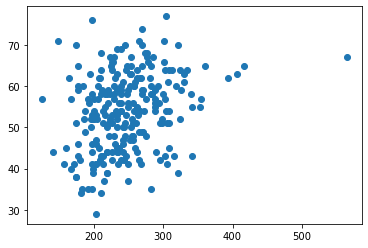

In [23]:
plt.scatter(heart_X_train, heart_y_train)
plt.show()

In [24]:
heart_X_test.shape, heart_X_train.shape

((61, 1), (242, 1))

In [25]:
# Create linear regression object

regr = linear_model.LinearRegression()

In [26]:
# Train the model using the training sets

regr.fit(heart_X_train, heart_y_train)

LinearRegression()

In [27]:
heart_y_pred = regr.predict(heart_X_train)

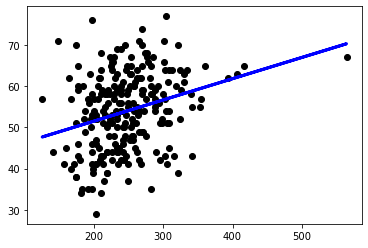

In [28]:
plt.scatter(heart_X_train, heart_y_train,  color='black')
plt.plot(heart_X_train, heart_y_pred, color='blue', linewidth=3)

plt.show()

In [32]:
# Make predictions using the testing set

heart_y_pred = regr.predict(heart_X_test)

In [33]:
# y = ax + b

In [34]:
# The coefficients

print('Coefficients: \n', regr.coef_)

# The intercept
print('Intercept: \n', regr.intercept_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(heart_y_test, heart_y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(heart_y_test, heart_y_pred))

Coefficients: 
 [[0.05169721]]
Intercept: 
 [41.162605]
Mean squared error: 71.51
Coefficient of determination: -0.33


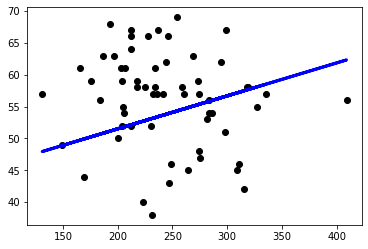

In [35]:
# Plot outputs

plt.scatter(heart_X_test, heart_y_test,  color='black')
plt.plot(heart_X_test, heart_y_pred, color='blue', linewidth=3)

plt.show()


## Polynomial Regression

In [36]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

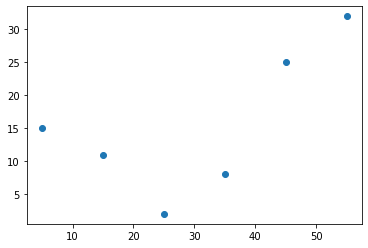

In [37]:
plt.scatter(x, y)
plt.show()

In [38]:
x.shape

(6, 1)

In [39]:
# degree can be greater than 2

transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_ = transformer.transform(x)

In [40]:
# Can replace the above three statements with
# x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [41]:
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [42]:
model = linear_model.LinearRegression()
model.fit(x_, y)

LinearRegression()

In [43]:
r_sq = model.score(x_, y)

print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498563
intercept: 21.372321428571418
coefficients: [-1.32357143  0.02839286]


In [44]:
# y = ax^2 + bx + c

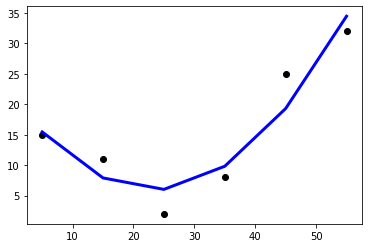

In [45]:
plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x_), color='blue', linewidth=3)

plt.show()

## Underfitting / Overfitting

In [46]:
# Using linear fit for above example (Under-fitting)

regr.fit(x, y)

y_pred = regr.predict(x)

# The coefficients

print('Coefficients: \n', regr.coef_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

Coefficients: 
 [0.38]
Mean squared error: 61.47
Coefficient of determination: 0.41


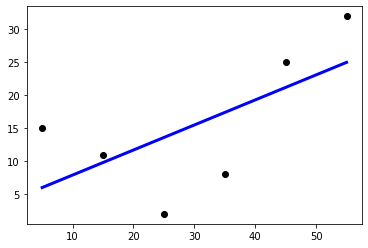

In [47]:
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.show()

coefficient of determination: 1.0
intercept: 15.020359754853416
coefficients: [-3.07804871e-12 -2.47328272e-10 -3.40704264e-09 -3.95084163e-08
 -3.63619813e-07 -2.06682371e-06  2.01144641e-07 -7.26480195e-09
  1.15642163e-10 -6.83323029e-13]


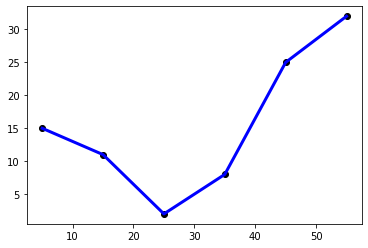

In [48]:
# Over-fitting

x_ = PolynomialFeatures(degree=10, include_bias=False).fit_transform(x)

model = linear_model.LinearRegression().fit(x_, y)

r_sq = model.score(x_, y)

print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)

plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x_), color='blue', linewidth=3)

plt.show()


## Train/Test split to avoid under/over fitting

In [49]:
transformer = PolynomialFeatures(degree=5, include_bias=False)

transformer.fit(heart_X_train)

PolynomialFeatures(degree=5, include_bias=False)

In [50]:
heart_X_train_trans = transformer.transform(heart_X_train)

In [51]:
heart_X_test_trans = transformer.transform(heart_X_test)

In [52]:
model = linear_model.LinearRegression().fit(heart_X_train_trans, heart_y_train)

In [53]:
heart_y_pred = model.predict(heart_X_test_trans)

In [54]:
# The coefficients

print('Coefficients: \n', model.coef_)

# The mean squared error

print('Mean squared error of test: %.2f'
      % mean_squared_error(heart_y_test, heart_y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination of test: %.2f'
      % r2_score(heart_y_test, heart_y_pred))

Coefficients: 
 [[-6.99138430e+00  4.90413824e-02 -1.63078075e-04  2.59006208e-07
  -1.57136142e-10]]
Mean squared error of test: 74.25
Coefficient of determination of test: -0.38


In [55]:
mse_list_test = list()
mse_list_train = list()

for i in range(1, 15):
    transformer = PolynomialFeatures(degree=i, include_bias=False)
    transformer.fit(heart_X_train)
    heart_X_train_trans = transformer.transform(heart_X_train)
    heart_X_test_trans = transformer.transform(heart_X_test)
    model = linear_model.LinearRegression().fit(heart_X_train_trans, heart_y_train)
    heart_y_pred = model.predict(heart_X_test_trans)
    mse_list_test.append(mean_squared_error(heart_y_test, heart_y_pred))
    heart_y_pred = model.predict(heart_X_train_trans)
    mse_list_train.append(mean_squared_error(heart_y_train, heart_y_pred))

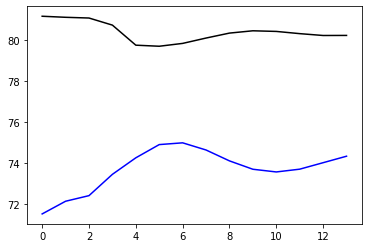

In [56]:
plt.plot(mse_list_test, 'b')
plt.plot(mse_list_train, 'k')
plt.show()

In [58]:
mse_list_test = np.array(mse_list_test)
np.argmin(mse_list_test)+1

1

In [59]:
np.argmin([1,2,3])

0

## Logistic Regression

In [60]:
from sklearn.model_selection import train_test_split
X=df.drop("target",axis=1)
y=df["target"]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,
                                                  random_state=2)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_preds_lr=lr.predict(X_test)

In [61]:
model = LogisticRegression()

In [62]:
# training the LogisticRegression model with Training data
model.fit(X_train, y_train)

LogisticRegression()

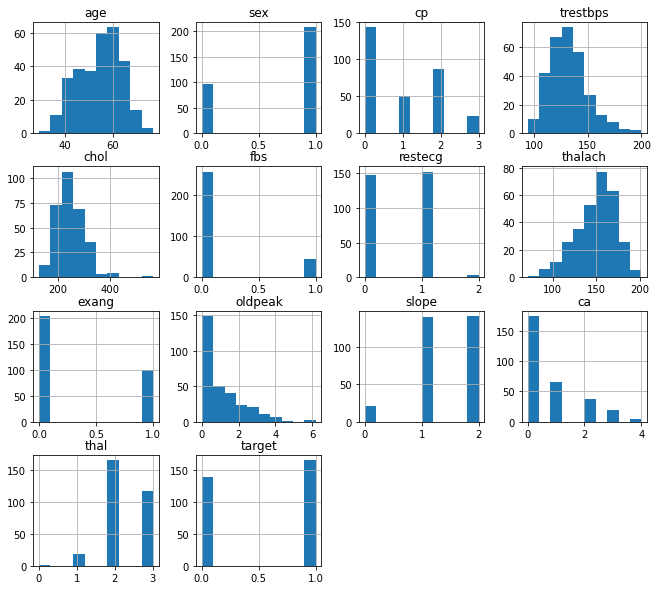

In [63]:
#plot histograms for each column

df.hist(figsize=(11,10))
plt.show()

## KNN Algorithm

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train , y_train)

KNeighborsClassifier()

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
X_test


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3


<AxesSubplot:xlabel='target', ylabel='count'>

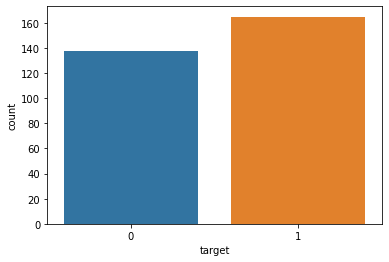

In [67]:
sns.countplot(x = 'target' , data=df)

<AxesSubplot:>

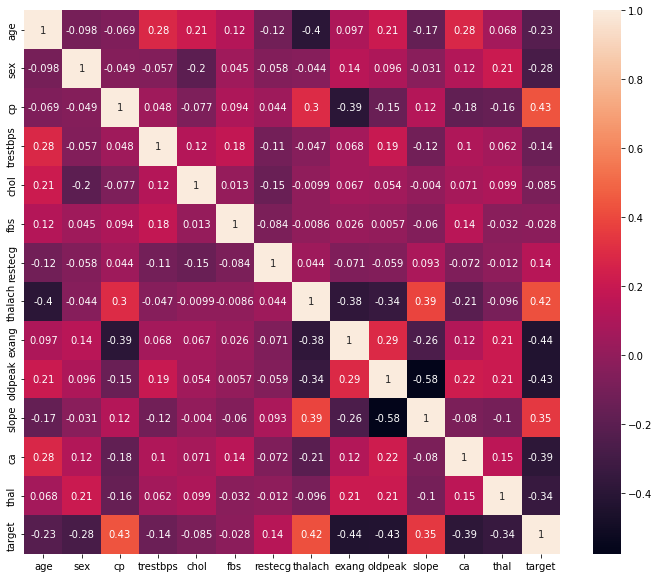

In [68]:
corr_mat = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat , annot=True)

## Confusion Matrix

<AxesSubplot:>

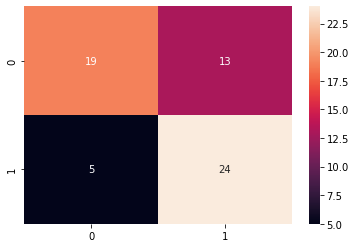

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

## Accuracy Score

In [70]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.8305785123966942
Accuracy on Test data :  0.9016393442622951


## Input Details

In [71]:
def prediction_calculator(n):
  for i in range(n):
      print("\nENTER THE DETAILS FOR PERSON : ",(i+1))
      age_ip=int(input("\nEnter Age: "))
      sex_ip=int(input("\nIf Female Enter 0\nIf Male Enter 1 : "))
      print("\nValue 0: asymptomatic\nValue 1: atypical angina\nValue 2: non-anginal pain")
      cp_ip=int(input("\nEnter Chest Pain value (0/1/2) : "))
      trestbps_ip=int(input("\nEntert Resting Blood Pressure: "))
      chol_ip=int(input("\nEnter Cholestrol Value: "))
      print("\nThe person’s fasting blood sugar if greater than 120mg Enter 1 or 0 ")
      fbs_ip=int(input("\nEnter Fasting Blood Pressure value (0/1): "))
      print("\nresting electrocardiographic results\nValue 0: showing probable or definit")
      restecg_ip=int(input("\nEnter Resting Electrocardiographic value (0/1/2) : "))
      thalach_ip=int(input("\nEnter Max heart rate achieved : "))
      exang_ip=int(input("\nEnter Exercise induced angina : "))
      oldpeak_ip=float(input("\nEnter ST depression induced value : "))
      print("\nPerson's slope value\n0: downsloping\n1: flat\n2: upsloping")
      slope_ip=int(input("\nEnter slope value (0/1/2) : "))
      ca_ip=int(input("\nEnter number of major vessels (0-3) : "))
      print("\nThalassemia:\nValue 0: NULL\nValue 1: fixed defect\nValue 2: normal blood ")
      thal_ip=int(input("\nEnter Thalassemia Value: "))
 
      c=np.array([age_ip, sex_ip, cp_ip, trestbps_ip, chol_ip, fbs_ip, restecg_ip, thalach_ip,exang_ip, oldpeak_ip, slope_ip, ca_ip, thal_ip])
      c_rs=c.reshape(1,-1)
      pred = lr.predict(c_rs)
      if pred==1:
          print("\n\nHeart Diseased person Please Consult the Doctor!!")
      else:
          print("\n\nThe Person No Heart Disease :)")
 
no_of_people=int(input("ENTER NUMBER OF PEOPLE : "))
prediction_calculator(no_of_people)

ENTER NUMBER OF PEOPLE : 1

ENTER THE DETAILS FOR PERSON :  1

Enter Age: 66

If Female Enter 0
If Male Enter 1 : 1

Value 0: asymptomatic
Value 1: atypical angina
Value 2: non-anginal pain

Enter Chest Pain value (0/1/2) : 0

Entert Resting Blood Pressure: 119

Enter Cholestrol Value: 219

The person’s fasting blood sugar if greater than 120mg Enter 1 or 0 

Enter Fasting Blood Pressure value (0/1): 0

resting electrocardiographic results
Value 0: showing probable or definit

Enter Resting Electrocardiographic value (0/1/2) : 0

Enter Max heart rate achieved : 140

Enter Exercise induced angina : 1

Enter ST depression induced value : 0.1

Person's slope value
0: downsloping
1: flat
2: upsloping

Enter slope value (0/1/2) : 2

Enter number of major vessels (0-3) : 1

Thalassemia:
Value 0: NULL
Value 1: fixed defect
Value 2: normal blood 

Enter Thalassemia Value: 2


The Person No Heart Disease :)
